# Principal Components Analysis - PCA analysis

In [52]:
import pandas as pd

# Reading wine data
wine_data = pd.read_csv(r"C:\KD_Doc\ML work\Lab_Home_work\winequalityN.csv")
wine_data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
# Droping "type" from data set it is no use in the activity
wine_data.drop(["type"],axis=1,inplace=True)

In [5]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
# Checking unique value in different columns
wine_data["quality"].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [20]:
# Removing rows wiht NaN values
wine_data = wine_data.dropna()
wine_data.shape

(6463, 12)

In [21]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### Over here i am trying to predict quality of wine

In [22]:
X = wine_data.drop("quality",axis=1)
y= wine_data["quality"]

In [23]:
from sklearn import preprocessing
X = preprocessing.scale(X)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .20,random_state = 0,)

In [24]:
# Performe SVM over this data
from sklearn.svm import LinearSVC
clf_svc = LinearSVC(penalty="l1",dual=False,tol = 1e-3)

In [25]:
# Fitting model over train data
clf_svc.fit(X_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l1', random_state=None, tol=0.001,
          verbose=0)

In [29]:
# Checking the accuracy of the model
print("Accuaracy of model :" ,clf_svc.score(X_train,y_train))

Accuaracy of model : 0.5323017408123791


#### This is accuarcy of base line model

# PCA analysis

In [30]:
# Visually analysing Correlation of variables
import matplotlib.pyplot as plt
import seaborn as sns

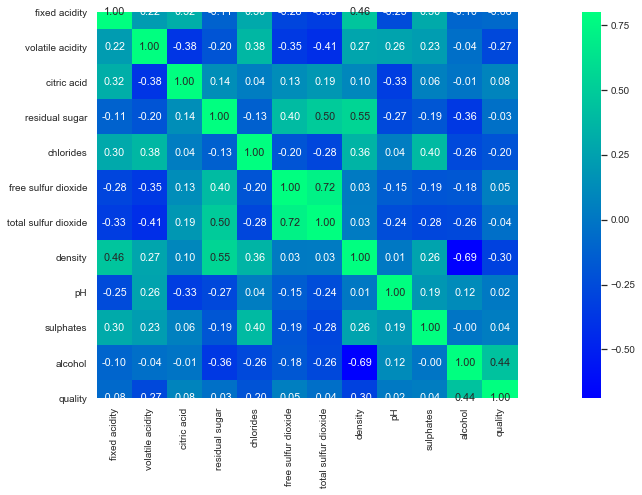

In [37]:
corrmat = wine_data.corr()
plt.figure(figsize= (18,7))
sns.set(font_scale=0.9)
sns.heatmap(corrmat,vmax=.8,square=True,annot=True,fmt=".2f",cmap = "winter")
plt.tight_layout()
plt.show()

As we can see few feature are strongly correlated with each other

In [38]:
# Now import PCA library
from sklearn.decomposition import PCA

In [39]:
pca = PCA(n_components=11,whiten=True)
X_reduced = pca.fit_transform(X)

In [40]:
pca.explained_variance_

array([3.03147015, 2.49532184, 1.55495761, 0.97116935, 0.72030772,
       0.60633301, 0.52324957, 0.50164974, 0.33701717, 0.22745516,
       0.03277095])

In [41]:
pca.explained_variance_ratio_

array([0.27554555, 0.22681234, 0.14133791, 0.08827446, 0.06547239,
       0.05511265, 0.04756078, 0.04559747, 0.03063318, 0.02067454,
       0.00297872])

"Explained_variance_" and "explained_variance_ratio_" give same information but "explained_variance_ratio_" give variance in %.
which make more sense and readable. As we can see some variable  give more vriance as compare to other variable.

# Scree plot or elbow plot

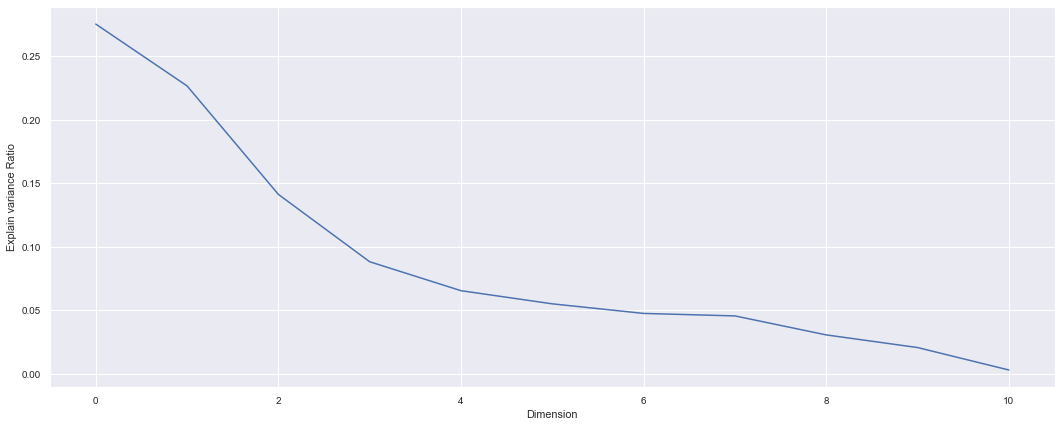

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,7))
plt.plot(pca.explained_variance_ratio_)
plt.xlabel("Dimension")
plt.ylabel("Explain variance Ratio")
plt.show()

# Using SVM over transform data without reducing dimensions of data and checking score of the model

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X_reduced,y,test_size = .20,random_state = 0,)
clf_svc = LinearSVC(penalty="l1",dual=False,tol = 1e-3)
clf_svc.fit(X_train,y_train)
print("Accuaracy of model :" ,clf_svc.score(X_test,y_test))

Accuaracy of model : 0.5336426914153132


 We are getting same score over transfrom data as earlier

### Now we will build the model wiht reduced variable and will check effect over accuracy of the model

In [49]:
pca = PCA(n_components=2,whiten=True)
X_reduced = pca.fit_transform(X)
print("\n")
print(pca.explained_variance_)
print("\n")
print(pca.explained_variance_ratio_)



[3.03147015 2.49532184]


[0.27554555 0.22681234]


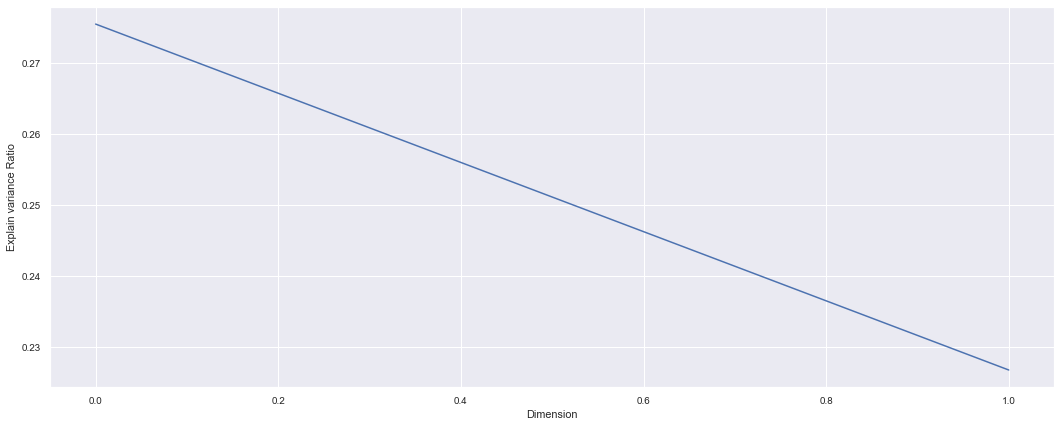

In [50]:
# scree plot with reduced varible
import matplotlib.pyplot as plt
plt.figure(figsize=(18,7))
plt.plot(pca.explained_variance_ratio_)
plt.xlabel("Dimension")
plt.ylabel("Explain variance Ratio")
plt.show()

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X_reduced,y,test_size = .20,random_state = 0,)
clf_svc = LinearSVC(penalty="l1",dual=False,tol = 1e-3)
clf_svc.fit(X_train,y_train)
print("Accuaracy of model :" ,clf_svc.score(X_test,y_test))

Accuaracy of model : 0.47641144624903325


Summary - As we can see over model accuracy didn't drop that much with reduced dimensions